In [3]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"tahabo","key":"0f1f2cde55c9d5118a34b3457a835fe7"}'}

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d ziya07/cooling-tower-optimization-dataset?select=cooling_tower_dataset.csv

Dataset URL: https://www.kaggle.com/datasets/ziya07/cooling-tower-optimization-dataset?select=cooling_tower_dataset.csv
License(s): CC0-1.0
400 Client Error: Bad Request for url: https://www.kaggle.com/api/v1/datasets/download/ziya07/cooling-tower-optimization-dataset?select=cooling_tower_dataset.csv?raw=false


In [ ]:
!kaggle datasets download -d ziya07/cooling-tower-optimization-dataset


Dataset URL: https://www.kaggle.com/datasets/ziya07/cooling-tower-optimization-dataset
License(s): CC0-1.0
  0% 0.00/193k [00:00<?, ?B/s]
100% 193k/193k [00:00<00:00, 566MB/s]


In [ ]:
!unzip cooling-tower-optimization-dataset.zip


Archive:  cooling-tower-optimization-dataset.zip
  inflating: cooling_tower_dataset.csv  


In [ ]:
df = pd.read_csv('cooling_tower_dataset.csv')
df.head()

,Timestamp,Outdoor Temp (°C),Outdoor Humidity (%),Wind Speed (m/s),Water Inlet Temp (°C),Water Outlet Temp (°C),Air Temp (°C),Water Flow Rate (L/s),Air Velocity (m/s),Cooling Tower Efficiency (%),...,Setpoint Temp (°C),Best Solution Found,Fitness Value,Iteration Number,PID Output,Energy Savings (%),Water Consumption (L),CO2 Emissions (kg),Sensor Status,System Operational Mode
0,2022-11-09 20:03:09,23.796603,62.542543,4.105312,31.221657,21.991713,23.315852,42.455764,2.809319,77.950470,...,24,93.717342,0.957561,96,0.264276,8.688841,152.221301,4.191653,OK,Energy-Saving
1,2022-11-09 20:08:09,24.111152,54.741698,2.740762,31.666742,24.121595,24.206961,47.199341,2.029315,80.255021,...,24,93.413298,0.954374,103,0.235521,8.012941,159.977340,4.515929,OK,Normal
2,2022-11-09 20:13:09,24.720661,56.295255,4.895845,25.834592,17.216876,23.300935,43.577318,2.544013,79.804967,...,24,92.900819,0.814579,96,0.376330,10.728318,153.332532,4.087465,OK,Maintenance
3,2022-11-09 20:18:09,29.012673,58.437284,4.966820,33.798787,23.973735,21.828032,43.175609,1.729151,84.037152,...,24,94.726349,0.927885,104,0.376175,9.595537,145.649898,5.342449,OK,Energy-Saving
4,2022-11-09 20:23:09,22.861655,69.707805,2.209182,34.175431,25.144107,24.643719,46.771322,2.701976,76.459876,...,24,94.235689,0.985936,97,0.346141,9.876709,144.927409,4.758520,OK,Energy-Saving


In [ ]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

Shape: (1000, 25)

Numeric columns: ['outdoor_temp_c', 'outdoor_humidity_pct', 'wind_speed_mpers', 'water_inlet_temp_c', 'water_outlet_temp_c', 'air_temp_c', 'water_flow_rate_lpers', 'air_velocity_mpers', 'cooling_tower_efficiency_pct', 'cooling_capacity_kw', 'energy_consumption_kwh', 'kp', 'ki', 'kd', 'error_c', 'setpoint_temp_c', 'best_solution_found', 'fitness_value', 'iteration_number', 'pid_output', 'energy_savings_pct', 'water_consumption_l', 'co2_emissions_kg']

Categorical columns: ['sensor_status', 'system_operational_mode']

Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2022-11-09 20:03:09 to 2022-11-13 07:18:09
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   outdoor_temp_c                1000 non-null   float64
 1   outdoor_humidity_pct          1000 non-null   float64
 2   wind_speed_mpers              1000 non-null   float64
 3   water_inle

/tmp/ipython-input-652733320.py:71: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df[num_cols].resample("H").mean()


<Figure size 1000x400 with 0 Axes>

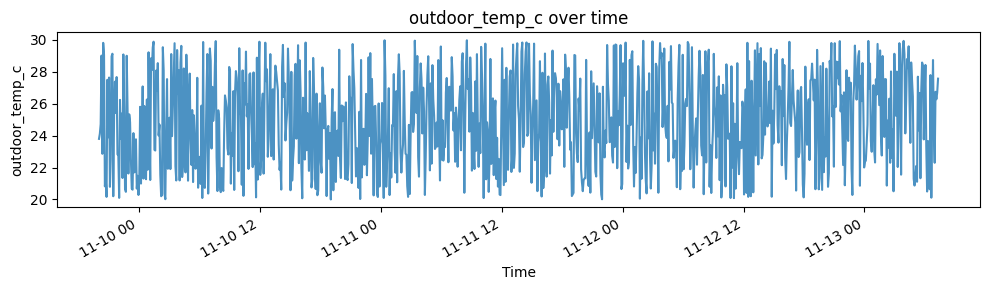

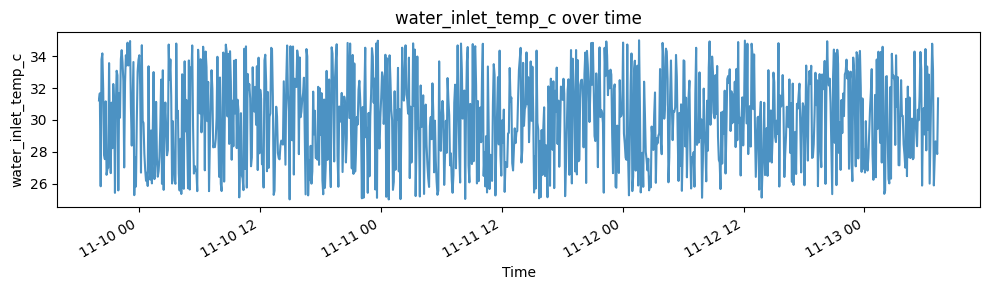

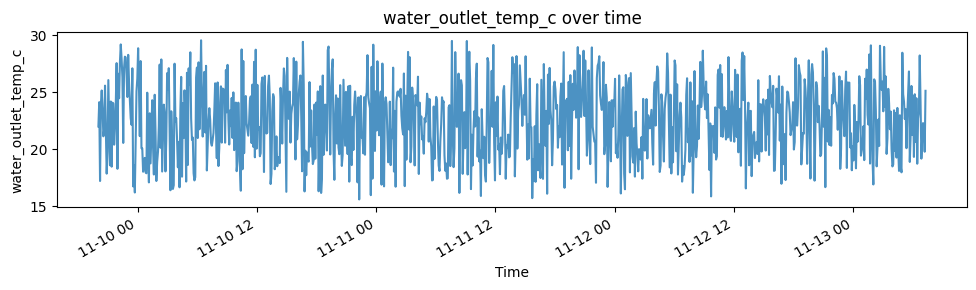

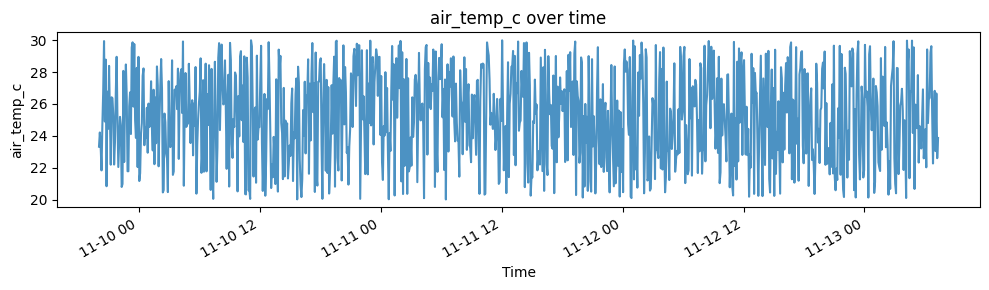

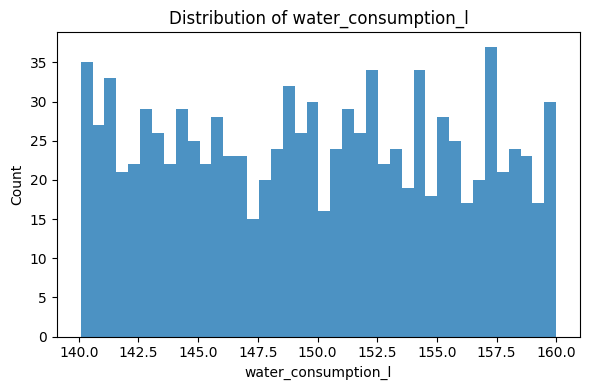

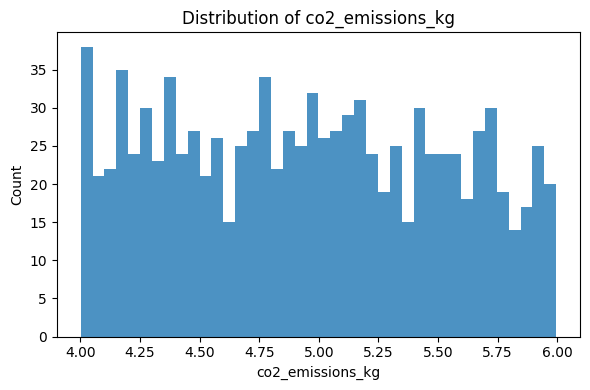

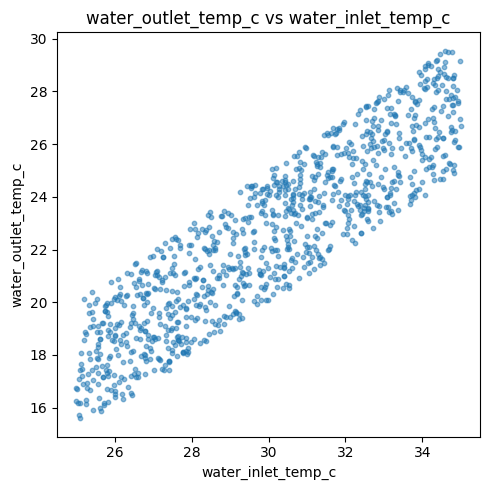

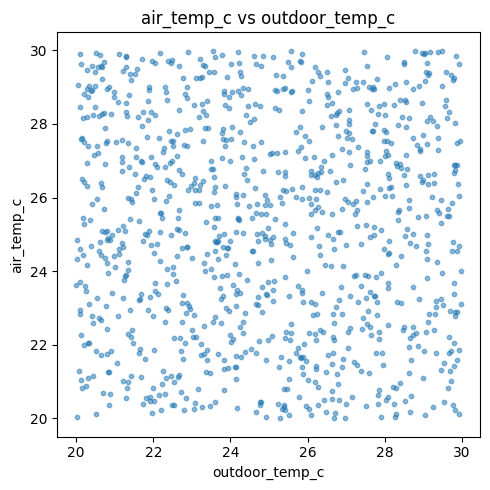

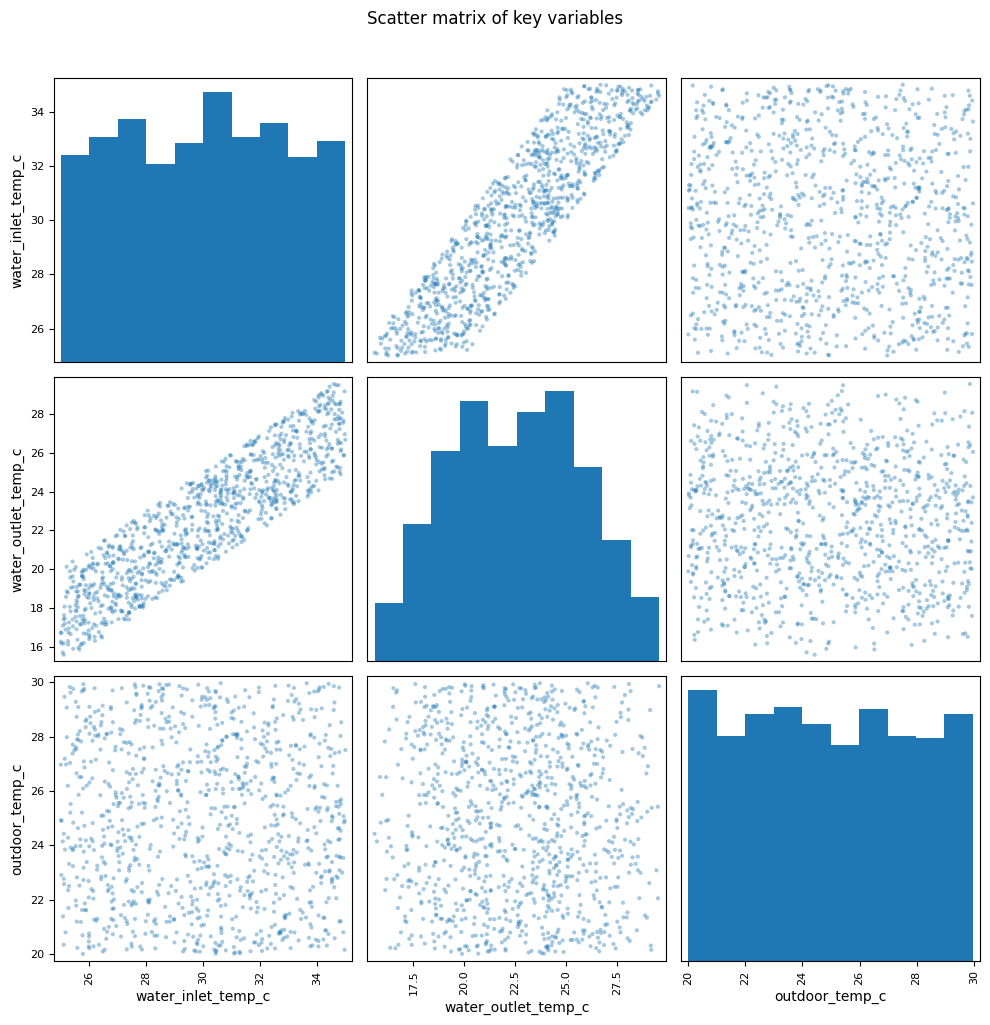

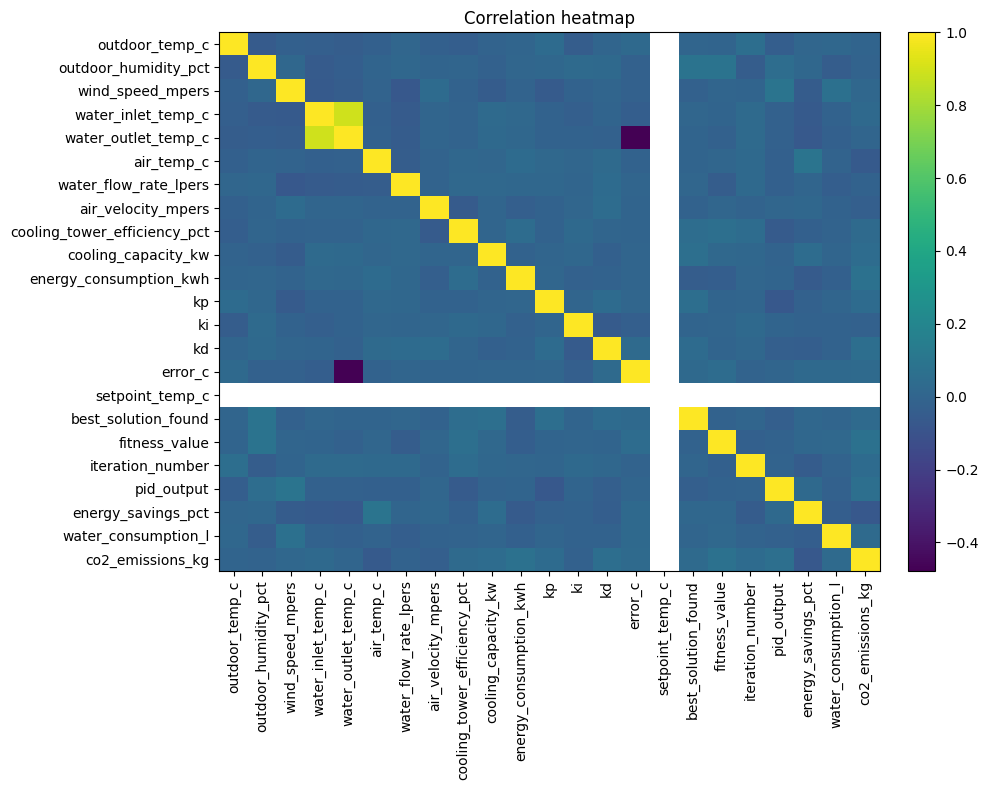


Saved cleaned dataset to cooling_tower_dataset_clean.csv


In [ ]:
df = df.copy()
# ==== 0) Setup ====
from pandas.plotting import scatter_matrix

pd.set_option("display.max_columns", 200)

# If df already exists from your read_csv call, keep it. Otherwise uncomment:
# df = pd.read_csv("cooling_tower_dataset.csv")

# ==== 1) Basic cleaning ====
# Parse timestamp
if not np.issubdtype(df["Timestamp"].dtype, np.datetime64):
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# Sort by time and set index for time series ops
df = df.sort_values("Timestamp").reset_index(drop=True)
df = df.set_index("Timestamp")

# Normalize column names to snake_case
def to_snake(s):
    return (
        s.strip()
         .lower()
         .replace("%", "pct")
         .replace("°c", "c")
         .replace("(", "")
         .replace(")", "")
         .replace("/", "per")
         .replace("-", " ")
         .replace(".", "")
         .replace("  ", " ")
         .replace(" ", "_")
    )

df.rename(columns={c: to_snake(c) for c in df.columns}, inplace=True)

# Identify numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Shape:", df.shape)
print("\nNumeric columns:", num_cols)
print("\nCategorical columns:", cat_cols)

# ==== 2) Quality checks ====
print("\nInfo:")
print(df.info())

print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))

# Remove exact duplicate rows if any
dups = df.duplicated().sum()
if dups > 0:
    print(f"\nFound {dups} duplicate rows. Dropping them.")
    df = df[~df.duplicated()]

# ==== 3) Quick stats ====
print("\nDescriptive statistics for numeric columns:")
print(df[num_cols].describe().T)

# Basic categorical summaries
for c in cat_cols:
    print(f"\nValue counts for {c}:")
    print(df[c].value_counts(dropna=False).head(10))

# ==== 4) Time range and sampling ====
if len(df) > 0:
    print("\nTime range:", df.index.min(), "to", df.index.max())
    # hourly means to smooth noisy signals
    hourly = df[num_cols].resample("H").mean()

# ==== 5) Core plots ====
plt.figure(figsize=(10, 4))
if "cooling_tower_efficiency_p" in df.columns:
    df["cooling_tower_efficiency_p"].plot(alpha=0.7)
    plt.title("Cooling Tower Efficiency percent over time")
    plt.xlabel("Time")
    plt.ylabel("Efficiency percent")
    plt.tight_layout()
    plt.show()

# Plot selected drivers vs time
drivers = [
    "outdoor_temp_c",
    "outdoor_humidity_p",
    "wind_speed_ms",
    "water_inlet_temp_c",
    "water_outlet_temp_c",
    "air_temp_c",
    "water_flow_rate_ls",
    "air_velocity_ms",
    "energy_savings_p",
]
drivers = [c for c in drivers if c in df.columns]

for c in drivers[:6]:
    plt.figure(figsize=(10, 3))
    df[c].plot(alpha=0.8)
    plt.title(f"{c} over time")
    plt.xlabel("Time")
    plt.ylabel(c)
    plt.tight_layout()
    plt.show()

# ==== 6) Distributions for key metrics ====
targets = ["cooling_tower_efficiency_p", "energy_savings_p", "water_consumption_l", "co2_emissions_kg"]
for c in [t for t in targets if t in df.columns]:
    plt.figure(figsize=(6,4))
    df[c].plot(kind="hist", bins=40, edgecolor="none", alpha=0.8)
    plt.title(f"Distribution of {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# ==== 7) Scatter plots for physics sanity checks ====
pairs = [
    ("water_inlet_temp_c", "water_outlet_temp_c"),
    ("outdoor_temp_c", "air_temp_c"),
    ("water_flow_rate_ls", "cooling_tower_efficiency_p"),
    ("air_velocity_ms", "cooling_tower_efficiency_p"),
    ("outdoor_humidity_p", "cooling_tower_efficiency_p"),
]
pairs = [(x, y) for x, y in pairs if x in df.columns and y in df.columns]

for x, y in pairs:
    plt.figure(figsize=(5,5))
    plt.scatter(df[x], df[y], s=10, alpha=0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{y} vs {x}")
    plt.tight_layout()
    plt.show()

# Scatter matrix for a compact view
subset_for_matrix = [c for c in ["cooling_tower_efficiency_p","water_inlet_temp_c","water_outlet_temp_c","outdoor_temp_c","outdoor_humidity_p","water_flow_rate_ls","air_velocity_ms","wind_speed_ms"] if c in df.columns]
if len(subset_for_matrix) >= 3:
    ax = scatter_matrix(df[subset_for_matrix].sample(min(len(df), 1000), random_state=0), figsize=(10,10), diagonal="hist", alpha=0.4)
    plt.suptitle("Scatter matrix of key variables", y=1.02)
    plt.tight_layout()
    plt.show()

# ==== 8) Correlation heatmap ====
corr = df[num_cols].corr(numeric_only=True)
plt.figure(figsize=(10,8))
im = plt.imshow(corr, aspect="auto")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("Correlation heatmap")
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr.index)), labels=corr.index)
plt.tight_layout()
plt.show()

# Top correlations with efficiency
if "cooling_tower_efficiency_p" in corr.columns:
    target_corr = corr["cooling_tower_efficiency_p"].drop(labels=["cooling_tower_efficiency_p"])
    print("\nTop positive correlations with efficiency:")
    print(target_corr.sort_values(ascending=False).head(10))
    print("\nTop negative correlations with efficiency:")
    print(target_corr.sort_values(ascending=True).head(10))

# ==== 9) Categorical interactions ====
# Box style comparison using simple scatter by category mean
for c in cat_cols:
    if "system_operational_mode" in c or "sensor_status" in c:
        grp = df.groupby(c)["cooling_tower_efficiency_p"].mean().sort_values(ascending=False) if "cooling_tower_efficiency_p" in df.columns else None
        if grp is not None:
            print(f"\nMean efficiency by {c}:")
            print(grp)
            plt.figure(figsize=(6,3))
            grp.plot(kind="bar")
            plt.title(f"Mean efficiency by {c}")
            plt.ylabel("Efficiency percent")
            plt.tight_layout()
            plt.show()

# ==== 10) Hourly trends and daily cycles ====
if len(df) > 0 and "cooling_tower_efficiency_p" in df.columns:
    hourly_eff = df["cooling_tower_efficiency_p"].resample("H").mean()
    plt.figure(figsize=(10,3))
    hourly_eff.plot()
    plt.title("Hourly mean efficiency")
    plt.xlabel("Time")
    plt.ylabel("Efficiency percent")
    plt.tight_layout()
    plt.show()

    # Diurnal cycle by hour of day
    diurnal = df.copy()
    diurnal["hour"] = diurnal.index.hour
    g = diurnal.groupby("hour")["cooling_tower_efficiency_p"].mean()
    plt.figure(figsize=(6,3))
    g.plot(kind="line", marker="o")
    plt.title("Average efficiency by hour of day")
    plt.xlabel("Hour")
    plt.ylabel("Efficiency percent")
    plt.xticks(range(0,24))
    plt.tight_layout()
    plt.show()

# ==== 11) Save a clean copy if you want ====
df.to_csv("cooling_tower_dataset_clean.csv")
print("\nSaved cleaned dataset to cooling_tower_dataset_clean.csv")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

Model Performance:
R² score: 0.023
Mean Absolute Error: 2.457 %


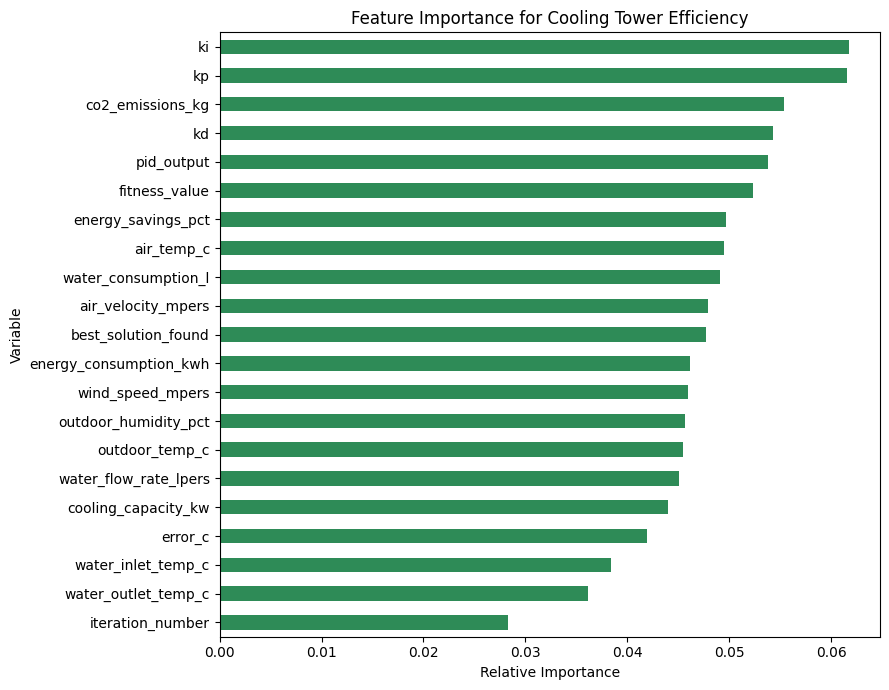


Top 10 influencing features:
ki                     0.061711
kp                     0.061511
co2_emissions_kg       0.055348
kd                     0.054269
pid_output             0.053825
fitness_value          0.052339
energy_savings_pct     0.049681
air_temp_c             0.049533
water_consumption_l    0.049077
air_velocity_mpers     0.047966
dtype: float64


In [ ]:
target = "cooling_tower_efficiency_pct"
features = [
    c for c in df.select_dtypes(include=[np.number]).columns
    if c != target and not c.startswith("setpoint_temp")  # exclude constant column
]

X = df[features]
y = df[target]

# --- Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Random Forest Model ---
rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
)
rf.fit(X_train, y_train)

# --- Predictions and Performance ---
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Model Performance:")
print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f} %")

# --- Feature Importances ---
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=True)

plt.figure(figsize=(9,7))
importances.plot(kind="barh", color="seagreen")
plt.title("Feature Importance for Cooling Tower Efficiency")
plt.xlabel("Relative Importance")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# --- Show top 10 ranked features ---
top10 = importances.sort_values(ascending=False).head(10)
print("\nTop 10 influencing features:")
print(top10)

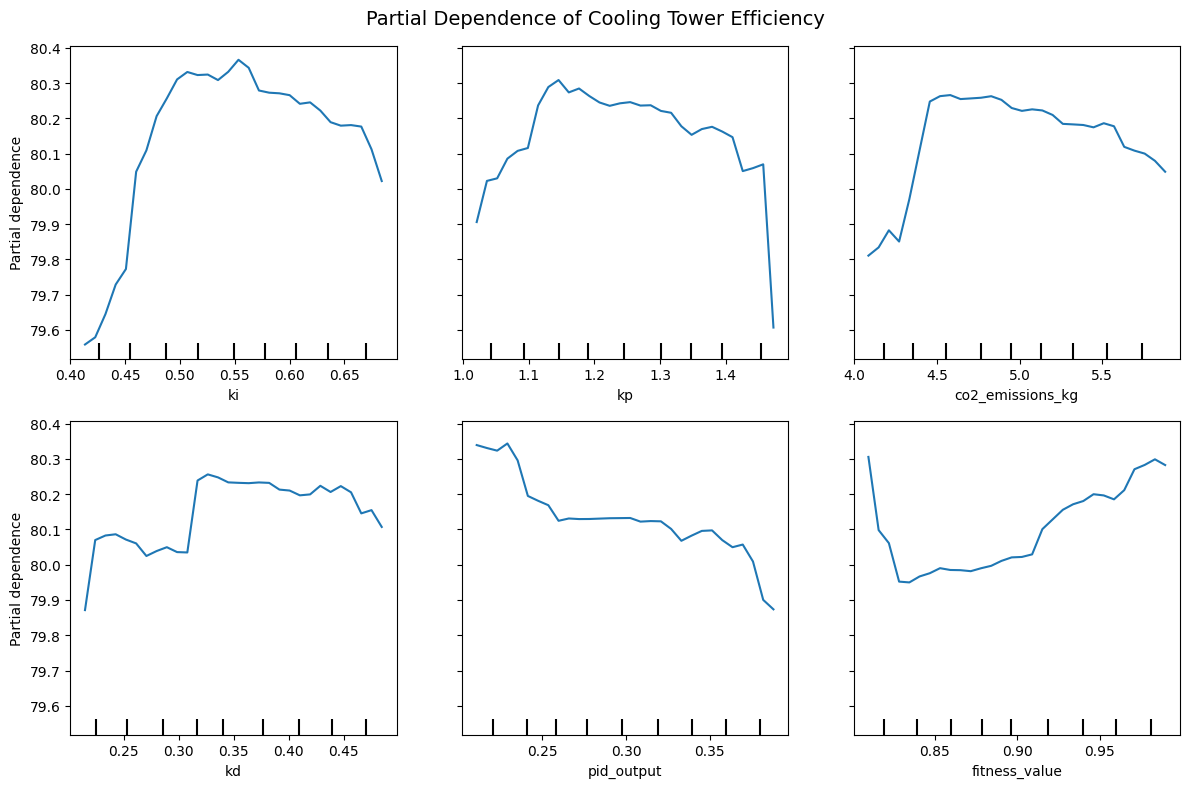

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

top_features = list(importances.sort_values(ascending=False).head(6).index)

# Create PDPs
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(
    rf, X, top_features, grid_resolution=30, ax=ax
)
plt.suptitle("Partial Dependence of Cooling Tower Efficiency", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

target_eff = "cooling_tower_efficiency_pct"
targets_cost = ["energy_consumption_kwh", "co2_emissions_kg", "water_consumption_l"]
ctrl_vars = ["kp","ki","kd","pid_output","air_velocity_mpers","water_flow_rate_lpers"]

# Use only numeric predictors the plant can influence or that reflect steady state
features = ctrl_vars + [
    # keep a few easy ambient/context variables to inform the surrogate
    "outdoor_temp_c","outdoor_humidity_pct","wind_speed_mpers","air_temp_c",
    "water_inlet_temp_c","water_outlet_temp_c"
]
features = [c for c in features if c in df.columns]

X = df[features].copy()
y_eff = df[target_eff].values
Y_cost = df[targets_cost].copy()

# 2) Train surrogates
X_tr, X_te, y_tr, y_te = train_test_split(X, y_eff, test_size=0.2, random_state=42)
rf_eff = RandomForestRegressor(n_estimators=600, random_state=42, min_samples_leaf=2)
rf_eff.fit(X_tr, y_tr)

rf_costs = {}
for t in targets_cost:
    rf = RandomForestRegressor(n_estimators=600, random_state=42, min_samples_leaf=2)
    rf.fit(X_tr, df.loc[X_tr.index, t].values)
    rf_costs[t] = rf

# 3) Normalizers for scalarization
sc = StandardScaler()
cost_stack = np.column_stack([df[t] for t in targets_cost])
sc.fit(cost_stack)

# 4) Bounds (from your stats + PDP “sweet spots” and physical ranges)
bounds = {
    "kp":  (1.10, 1.30),
    "ki":  (0.50, 0.58),
    "kd":  (0.32, 0.42),
    "pid_output": (0.22, 0.32),
    "air_velocity_mpers": (max(1.5, df["air_velocity_mpers"].quantile(0.10)),
                           min(3.0, df["air_velocity_mpers"].quantile(0.90)+0.4)),
    "water_flow_rate_lpers": (45.0, 55.0),
}

# For ambient/context in optimization, fix them to recent medians (you can swap for forecasts)
context = {
    "outdoor_temp_c": float(df["outdoor_temp_c"].median()),
    "outdoor_humidity_pct": float(df["outdoor_humidity_pct"].median()),
    "wind_speed_mpers": float(df["wind_speed_mpers"].median()),
    "air_temp_c": float(df["air_temp_c"].median()),
    "water_inlet_temp_c": float(df["water_inlet_temp_c"].median()),
    "water_outlet_temp_c": float(df["water_outlet_temp_c"].median()),
}

# 5) Objective = maximize efficiency – weighted normalized costs – penalties
w_eff = 1.0
w_energy, w_co2, w_water = 0.35, 0.35, 0.15   # tune these as policy
pen_pid_hi = 0.6    # penalty weight if pid_output > 0.30
pen_emiss_hi = 0.6  # penalty weight if CO2 > 5.2 kg

def score_rows(C):
    """C is a DataFrame with candidate settings + context."""
    pred_eff = rf_eff.predict(C[features])
    pred_energy = rf_costs["energy_consumption_kwh"].predict(C[features])
    pred_co2 = rf_costs["co2_emissions_kg"].predict(C[features])
    pred_water = rf_costs["water_consumption_l"].predict(C[features])

    # normalize costs
    norm_costs = sc.transform(np.column_stack([pred_energy, pred_co2, pred_water]))
    E, C2, W = norm_costs.T

    # soft constraints / penalties
    pid_pen = np.where(C["pid_output"].values > 0.30,
                       pen_pid_hi * (C["pid_output"].values - 0.30), 0.0)
    co2_pen = np.where(pred_co2 > 5.2, pen_emiss_hi * (pred_co2 - 5.2), 0.0)

    return (w_eff*pred_eff
            - w_energy*E - w_co2*C2 - w_water*W
            - pid_pen - co2_pen), pred_eff, pred_energy, pred_co2, pred_water

# 6) Random-search + local refinement (fast & robust)
rng = np.random.default_rng(0)
N = 100000  # candidates

cand = {k: rng.uniform(v[0], v[1], N) for k, v in bounds.items()}
for k, v in context.items():
    cand[k] = np.full(N, v)

C = pd.DataFrame(cand)
S, Peff, Pene, Pco2, Pwater = score_rows(C)
best_idx = int(np.argmax(S))
best = C.iloc[best_idx].to_dict()

print("\n=== Suggested Operating Point (data-driven) ===")
for k in ["kp","ki","kd","pid_output","air_velocity_mpers","water_flow_rate_lpers"]:
    print(f"{k:>22}: {best[k]:.4f}")
print(f"Predicted efficiency (%): {Peff[best_idx]:.3f}")
print(f"Pred energy (kWh)      : {Pene[best_idx]:.3f}")
print(f"Pred CO2 (kg)          : {Pco2[best_idx]:.3f}")
print(f"Pred water (L)         : {Pwater[best_idx]:.3f}")

# 7) Small neighborhood search around the best point (polish)
def neighborhood(center, frac=0.15, m=8000):
    nn = {}
    for k,(lo,hi) in bounds.items():
        span = (hi - lo) * frac
        nn[k] = np.clip(rng.normal(loc=center[k], scale=span/2, size=m), lo, hi)
    for k,v in context.items():
        nn[k] = np.full(m, v)
    return pd.DataFrame(nn)

C2 = neighborhood(best, frac=0.12, m=12000)
S2, Peff2, Pene2, Pco22, Pwater2 = score_rows(C2)
b2 = int(np.argmax(S2))

print("\n=== Polished Setpoint ===")
for k in ["kp","ki","kd","pid_output","air_velocity_mpers","water_flow_rate_lpers"]:
    print(f"{k:>22}: {C2.iloc[b2][k]:.4f}")
print(f"Predicted efficiency (%): {Peff2[b2]:.3f}")
print(f"Pred energy (kWh)      : {Pene2[b2]:.3f}")
print(f"Pred CO2 (kg)          : {Pco22[b2]:.3f}")
print(f"Pred water (L)         : {Pwater2[b2]:.3f}")


=== Suggested Operating Point (data-driven) ===
                    kp: 1.2815
                    ki: 0.5610
                    kd: 0.3787
            pid_output: 0.2318
    air_velocity_mpers: 2.5619
 water_flow_rate_lpers: 54.6778
Predicted efficiency (%): 82.121
Pred energy (kWh)      : 121.078
Pred CO2 (kg)          : 5.062
Pred water (L)         : 148.981

=== Polished Setpoint ===
                    kp: 1.2949
                    ki: 0.5569
                    kd: 0.3819
            pid_output: 0.2315
    air_velocity_mpers: 2.5595
 water_flow_rate_lpers: 54.7578
Predicted efficiency (%): 82.137
Pred energy (kWh)      : 121.032
Pred CO2 (kg)          : 5.055
Pred water (L)         : 149.118
